<h2 align='center'> Survival of a Patient </h2>

### Context 
A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

### Objective 
The objective of the dataset is predicting the chances of Survival of a Patient after 1 year of treatment

### About the dataset
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
Survived_1_year == 1, implies that the patient survived after 1 year of treatment

#### Data Description:

- ID_Patient_Care_Situation: Care situation of a patient during treatment
- Diagnosed_Condition: The diagnosed condition of the patient
- ID_Patient: Patient identifier number
- Treatment_with_drugs: Class of drugs used during treatment
- Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
- Patient_Age: Age of the patient
- Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
- Patient_Smoker: If the patient was a smoker or not
- Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
- Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

### Evaluation Criteria
Submissions are evaluated using the F1 Score

<hr>

#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

#### Loading Training Dataset 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


### Inspecting Data

In [3]:
df.shape

(23097, 18)

- Training Dataset comprises 23097 observations(rows) and 18 features(columns).
- Out of the 18, one is the target variable and rest 17 are input variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

* Dataset have 9 Float columns, 5 integer columns, and 4 object type columns
* Dataset also have missing values

### Statistical Summary
- Get a Statistical Overview using Describe

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_Patient_Care_Situation,23097.0,16545.712041,9532.263503,2.0000,8280.00000,16597.000000,24825.000000,33014.000000
Diagnosed_Condition,23097.0,26.413127,15.030865,0.0000,13.00000,26.000000,39.000000,52.000000
Patient_ID,23097.0,6261.280772,3595.990620,1.0000,3181.00000,6242.000000,9363.000000,12515.000000
Patient_Age,23097.0,33.209768,19.549882,0.0000,16.00000,33.000000,50.000000,149.000000
Patient_Body_Mass_Index,23097.0,23.454820,3.807661,1.0893,20.20555,23.386199,26.788154,29.999579
A,21862.0,0.897905,0.302780,0.0000,1.00000,1.000000,1.000000,1.000000
B,21862.0,0.136355,0.343173,0.0000,0.00000,0.000000,0.000000,1.000000
C,21862.0,0.185070,0.388363,0.0000,0.00000,0.000000,0.000000,1.000000
D,21862.0,0.083615,0.276817,0.0000,0.00000,0.000000,0.000000,1.000000
E,21862.0,0.393239,0.488480,0.0000,0.00000,0.000000,1.000000,1.000000


### Inference:
- The attributes(predictors) “Patient Age” has a **large difference between 75th %tile and max values** .
Thus, the observation suggest that there are extreme values i.e Outliers in our dataset.

###  Explotary Data Analysis

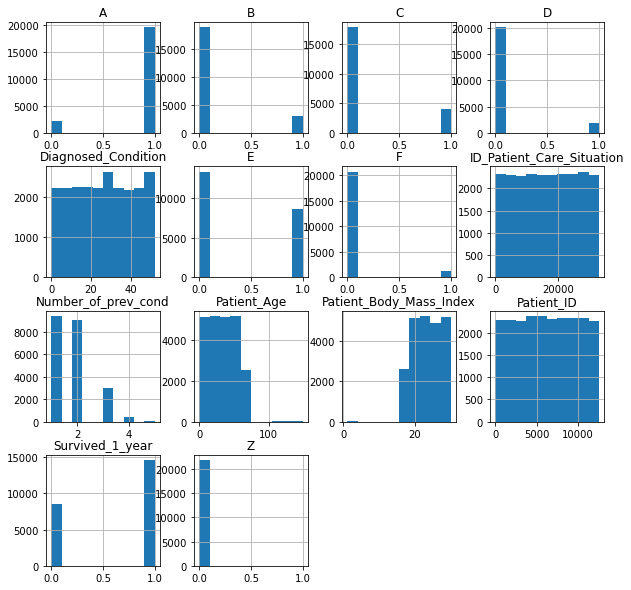

In [6]:
df.hist(figsize=(10,10))
plt.show()

### Inference from Histogram:
* Patient Age is shifted towrds left, beyond 100 there seems to have observation, which may be outlier.
* A, B, C, D, E, F, Z, Number_of_prev_cond, Survived_1_year Categorical Variables which is in Encoded format
* Diagnosed_Condition, Patient_Care_Sitiuation, Patient_ID seems to be not relevent columns


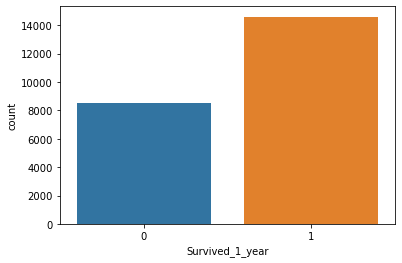

In [7]:
sns.countplot(df.Survived_1_year)

#### Frequency Counts 

In [8]:
df.Survived_1_year.value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

- There are more values of survived pateints in 1 year 

In [9]:
dup = df[df.duplicated()]
dup.shape

(0, 18)

There is No duplicate data in Dataset

### Detecting Outlier

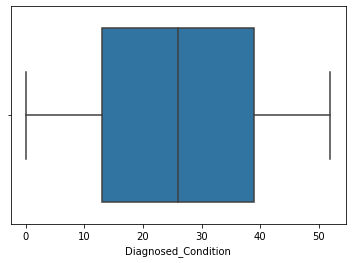

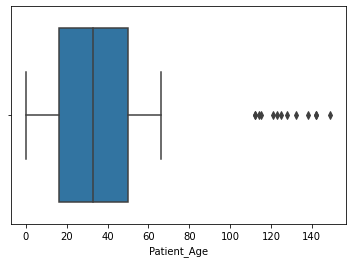

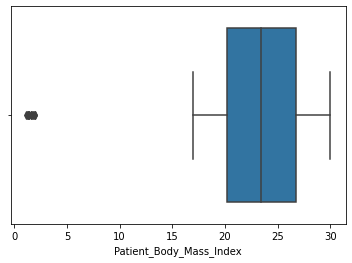

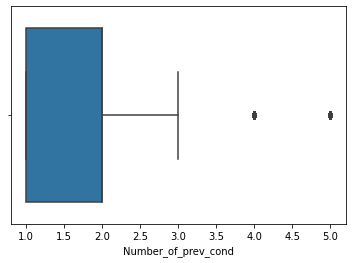

In [10]:
col = ['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index','Number_of_prev_cond']

for i in col:
    sns.boxplot(df[i])
    plt.show()

### Inference from Boxplot 

<hr>

* 'ID_Patient_Care_Situation', 'Diagnosed_Condition','Patient_ID'  have **No Outlier** 
* 'Patient_Age', 'Patient_Body_Mass_Index','Number_of_prev_cond' have **Moderate Outlier**

### Outlier Treatment

- Check the 95 percentile value of Patients Age

In [11]:
np.percentile(df.Patient_Age, [95])[0]

63.0

- Display all the records of patients who are above the age 90

In [12]:
uv = np.percentile(df.Patient_Age, [95])[0]
df[df.Patient_Age > 90]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,33012,0,12513,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
218,33008,0,12509,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2540,33014,0,12515,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2711,33004,0,12505,NaN,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,33001,0,12502,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4887,33011,0,12512,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6308,33010,0,12511,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10388,33006,0,12507,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10663,33009,0,12510,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
12782,33000,0,12501,NaN,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


It seems that Persons Age above 100 is extreme outlier to our dataset,
- As we can observe, Patients with age above 90 almost have same records.
- All the patients are from Rural, Smoker has value "Cannot Say", even A,B,C,D,E,F,Z have same records.
- Their Body mass index ranges in between 1-2 

Keeping these outlier may effect our Data. So, removing these Outliers

In [13]:
df_new = df[df.Patient_Age < 90]

**Check if the new dataset have outlier or not ?**

In [14]:
df_new[df_new.Patient_Age > 90]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year


In [15]:
df_new.shape

(23084, 18)

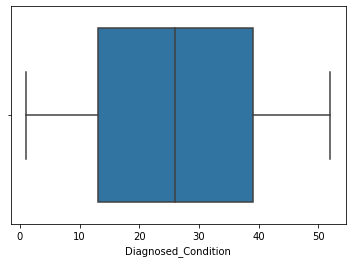

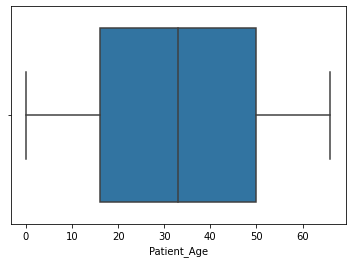

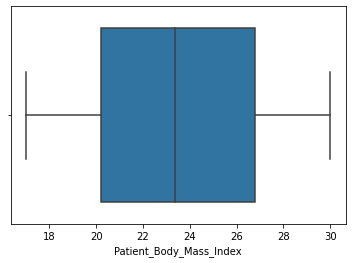

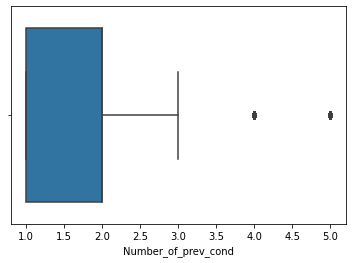

In [16]:
col = ['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index','Number_of_prev_cond']

for i in col:
    sns.boxplot(df_new[i])
    plt.show()

### Analysing Textual Data

In [17]:
df_new['Patient_Smoker'].value_counts()

NO     13246
YES     9838
Name: Patient_Smoker, dtype: int64

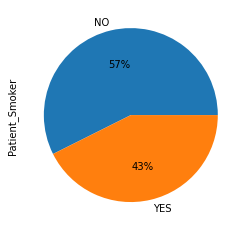

In [18]:
df_new['Patient_Smoker'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

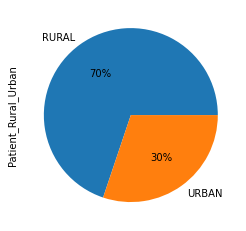

In [19]:
df_new['Patient_Rural_Urban'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

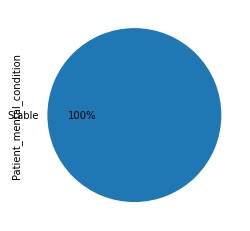

In [20]:
df_new['Patient_mental_condition'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

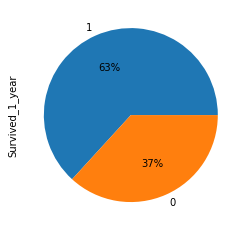

In [21]:
df_new['Survived_1_year'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

### Inference :

<hr>

* 63% Patients Survived in 1 year of treatment
* Patient Mental condition is irrelevent column for predicting Survival of patient
* There is 70% Rural patients and 30% Urban patients
* 43% patients are smoker and 57% are Non smokers

In [22]:
pd.crosstab(df_new.Survived_1_year, df_new.Patient_Smoker)

Patient_Smoker,NO,YES
Survived_1_year,,
0,3479,5015
1,9767,4823


In [23]:
pd.crosstab(df_new.Survived_1_year, df_new.Patient_Rural_Urban)

Patient_Rural_Urban,RURAL,URBAN
Survived_1_year,,
0,5357,3137
1,10764,3826


In [24]:
pd.crosstab(df_new.Survived_1_year, df_new.Treated_with_drugs)

Treated_with_drugs,DX1,DX1 DX2,DX1 DX2 DX3,DX1 DX2 DX3 DX4,DX1 DX2 DX3 DX4 DX5,DX1 DX2 DX3 DX5,DX1 DX2 DX4,DX1 DX2 DX4 DX5,DX1 DX2 DX5,DX1 DX3,...,DX2 DX4 DX5,DX2 DX5,DX3,DX3 DX4,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6
Survived_1_year,,,,,,,,,,,,,,,,,,,,,
0,460,155,32,5,0,2,33,5,21,79,...,12,68,479,115,16,61,548,93,351,4943
1,1375,293,63,19,3,12,66,13,82,345,...,72,332,1351,333,80,346,1244,330,1558,3663


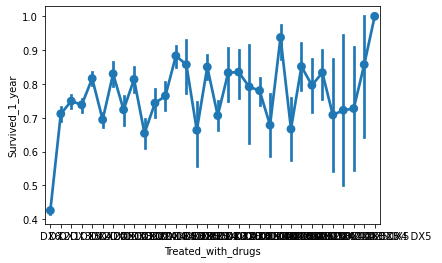

In [25]:
sns.pointplot(df_new['Treated_with_drugs'], df_new['Survived_1_year'])

### Correlation Matrix

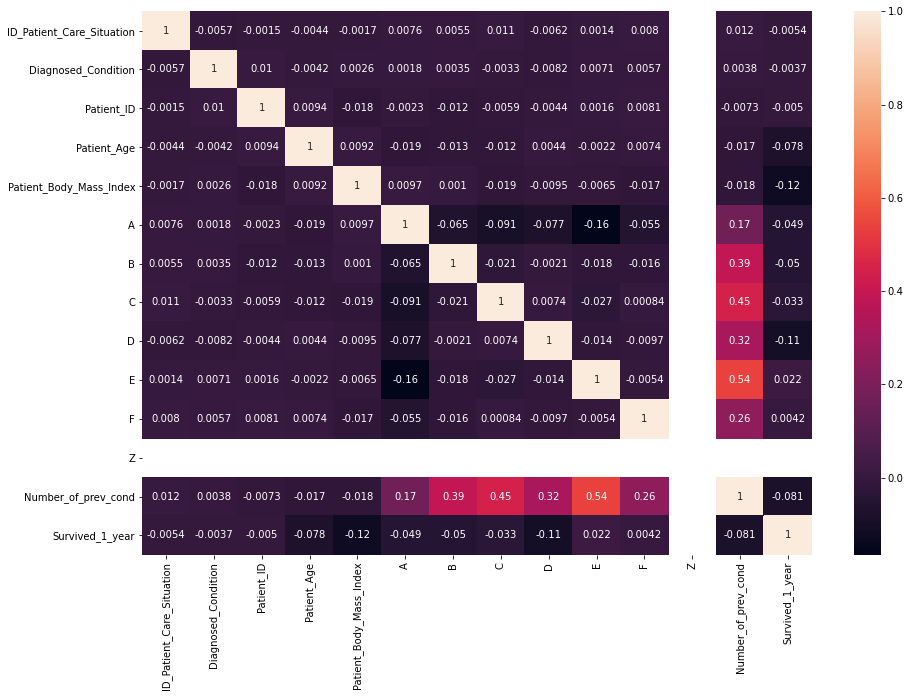

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(), annot=True)

## Data preprocessing

#### checking null values

In [27]:
df_new.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

####  Filling Missing values with Mode (Most frequent values)

In [28]:
df_new['Treated_with_drugs'] = df_new['Treated_with_drugs'].fillna(value=df_new['Treated_with_drugs'].mode()[0])
df_new['A'] = df_new['A'].fillna(value=df_new['A'].mode()[0])
df_new['B'] = df_new['B'].fillna(value=df_new['B'].mode()[0])
df_new['C'] = df_new['C'].fillna(value=df_new['C'].mode()[0])
df_new['D'] = df_new['D'].fillna(value=df_new['D'].mode()[0])
df_new['E'] = df_new['E'].fillna(value=df_new['E'].mode()[0])
df_new['F'] = df_new['F'].fillna(value=df_new['F'].mode()[0])
df_new['Z'] = df_new['Z'].fillna(value=df_new['Z'].mode()[0])
df_new['Number_of_prev_cond'] = df_new['Number_of_prev_cond'].fillna(value=df_new['Number_of_prev_cond'].mode()[0])

#### Checking if null is filled or not

In [29]:
df_new.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

### Droping Irrelevent columns 

In [30]:
df_1 = df_new.drop(['ID_Patient_Care_Situation', 'Patient_ID','Patient_mental_condition'], axis=1)
df_1.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,8,DX6,56,18.479385,YES,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,5,DX2,36,22.945566,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,DX6,48,27.510027,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,DX1,5,19.130976,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,45,DX6,47,26.155120,YES,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


####  Encoding Textual Data

In [31]:
df_1 = pd.get_dummies(df_1, drop_first=True)
df_1.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_YES,Patient_Rural_Urban_URBAN
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,45,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1


### Spliting data 

In [32]:
x = df_1.drop(['Survived_1_year'],axis=1)
x.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_YES,Patient_Rural_Urban_URBAN
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,45,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1


In [33]:
print("shape of x:", x.shape)

shape of x: (23084, 44)


In [34]:
y = df_1[['Survived_1_year']]
y.head()

,Survived_1_year
0,0
1,1
2,0
3,1
5,0


In [35]:
print("shape of y:", y.shape)

shape of y: (23084, 1)


### Split into test and train dataset (70-30 ratio)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
print("Dataset shape:", df_1.shape)
print("Input Features shape: ", x_train.shape, y_train.shape)
print("Output Features shape: ", x_test.shape, y_test.shape)

Dataset shape: (23084, 45)
Input Features shape:  (16158, 44) (16158, 1)
Output Features shape:  (6926, 44) (6926, 1)


<h2 align='center'> Logistic regression </h2>

In [38]:
from sklearn.linear_model import LogisticRegression

### Training Model

In [39]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

### Prediction on Training and Test set

In [40]:
train_pred = clf.predict(x_train)
pred = clf.predict(x_test)

#### Accuracy on Training and Test dataset

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
print("Training Accuracy: ", accuracy_score(y_train, train_pred))
print("Test Accuracy: ", accuracy_score(y_test, pred))

Training Accuracy:  0.7312167347443991
Test Accuracy:  0.7268264510539995


### Confusion Matrix and Classification report
- Check the F1 Score 

In [43]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred))

print("\nClassification Report:")
print(classification_report(y_test, pred))

Confusion Matrix: 
[[1283 1285]
 [ 607 3751]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.50      0.58      2568
           1       0.74      0.86      0.80      4358

    accuracy                           0.73      6926
   macro avg       0.71      0.68      0.69      6926
weighted avg       0.72      0.73      0.72      6926



<h2 align='center'> Decision Tree </h2>

In [44]:
from sklearn.tree import DecisionTreeClassifier

### Training Model

In [45]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

### Prediction on Training and Test set

In [46]:
train_pred = dt.predict(x_train)
pred = dt.predict(x_test)

#### Accuracy on Training and Test dataset

In [47]:
print("Training Accuracy: ", accuracy_score(y_train, train_pred))
print("Test Accuracy: ", accuracy_score(y_test, pred))

Training Accuracy:  0.9996905557618517
Test Accuracy:  0.7681201270574646


- As the Test Accuracy is Less than Training Accuracy , Model seems to be Overfitted

### Confusion Matrix and Classification report
- Check the F1 Score 

In [48]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred))

print("\nClassification Report:")
print(classification_report(y_test, pred))

Confusion Matrix: 
[[1757  811]
 [ 795 3563]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      2568
           1       0.81      0.82      0.82      4358

    accuracy                           0.77      6926
   macro avg       0.75      0.75      0.75      6926
weighted avg       0.77      0.77      0.77      6926



<h1 align='center'> Random Forest </h1> 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_estimators= 1000, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

#### Prediction on Training and Testset

In [51]:
train_pred = rf.predict(x_train)
pred = rf.predict(x_test)

#### Accuracy on Training and Test dataset 

In [52]:
print("Training Accuracy: ",accuracy_score(y_train, train_pred))
print("Test Accuracy: ",accuracy_score(y_test, pred))

Training Accuracy:  0.9996905557618517
Test Accuracy:  0.8167773606699393


#### Confusion Matrix and Classification report
- Check the F1 Score 

In [53]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pred))

print("\nClassification Report:")
print(classification_report(y_test, pred))

Confusion Matrix: 
[[1835  733]
 [ 536 3822]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2568
           1       0.84      0.88      0.86      4358

    accuracy                           0.82      6926
   macro avg       0.81      0.80      0.80      6926
weighted avg       0.81      0.82      0.82      6926



### Visualise the feature importance

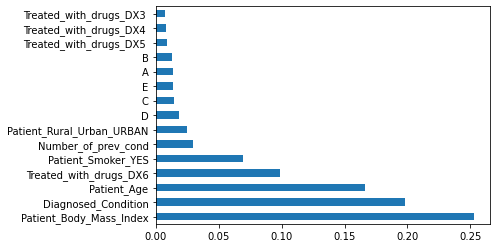

In [54]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

### Hyper-parameter Tunning

- Train Model by top 5 features

In [55]:
rf1 = RandomForestClassifier(n_estimators= 1000, max_depth=10, min_samples_split=3, max_features=15,
                            random_state= 42)
# Training Model
rf1.fit(x_train, y_train)

# Prediction 
rf1_pred_train = rf1.predict(x_train)
rf1_pred = rf1.predict(x_test)

#### Important Features taken to train Model 

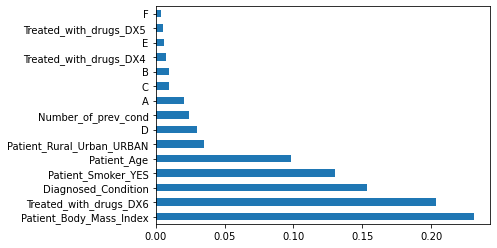

In [56]:
feat_importances = pd.Series(rf1.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### Accuracy on Training and Test dataset 

In [57]:
print("Training Accuracy: ", accuracy_score(y_train, rf1_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, rf1_pred))

Training Accuracy:  0.8677435326154227
Test Accuracy:  0.8221195495235345


### Confusion Matrix and Classification Report
-  Check F1 Score

In [58]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, rf1_pred))

print("\nClassification Report:")
print(classification_report(y_test, rf1_pred))

Confusion Matrix: 
[[1803  765]
 [ 467 3891]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.75      2568
           1       0.84      0.89      0.86      4358

    accuracy                           0.82      6926
   macro avg       0.81      0.80      0.80      6926
weighted avg       0.82      0.82      0.82      6926



<h1 align='center'> Gradient-Boost </h1>

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

### Training Model and Prediction on Test and Training set

In [60]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

# Prediction 
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

####  Accuracy Score on Training and Test set

In [61]:
print("Training Accuracy: ",accuracy_score(y_train, gb_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

Training Accuracy:  0.8303626686471098
Test Accuracy:  0.829483107132544


#### Confusion Matrix and Classification Report 

- Check F1 Score

In [62]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, gb_pred))

print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

Confusion Matrix: 
[[1783  785]
 [ 396 3962]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      2568
           1       0.83      0.91      0.87      4358

    accuracy                           0.83      6926
   macro avg       0.83      0.80      0.81      6926
weighted avg       0.83      0.83      0.83      6926



### Hyper-parameter tunning

In [63]:
gb2 = GradientBoostingClassifier(n_estimators =500, min_samples_split=3, subsample =0.9,
                                 random_state=42)

# Training Model
gb2.fit(x_train, y_train)

# Prediction 
gb2_pred_train = gb2.predict(x_train)
gb2_pred = gb2.predict(x_test)

#### Accuracy Score on Training and Test set

In [64]:
print("Training Accuracy: ", accuracy_score(y_train, gb2_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, gb2_pred))

Training Accuracy:  0.8608119816809011
Test Accuracy:  0.8401674848397344


#### Confusion Matrix and Classification Report 

- Check F1 Score

In [65]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, gb2_pred))

print("\nClassification Report:")
print(classification_report(y_test, gb2_pred))

Confusion Matrix: 
[[1920  648]
 [ 459 3899]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2568
           1       0.86      0.89      0.88      4358

    accuracy                           0.84      6926
   macro avg       0.83      0.82      0.83      6926
weighted avg       0.84      0.84      0.84      6926



<h1 align='center'> Test Dataset </h1>

#### Load Test dataset

In [66]:
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
test.shape

(9303, 17)

- Training Dataset comprises 9303 observations(rows) and 17 features(columns).
- All 17 are input variables.

### Data-preprocessing steps on test dataset

In [68]:
test = test.drop(['ID_Patient_Care_Situation', 'Patient_ID', 'Patient_mental_condition'], axis=1)

In [69]:
test = pd.get_dummies(test, drop_first=True)

In [70]:
test.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_YES,Patient_Rural_Urban_URBAN
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


### Prediction on Test Dataset Using Logistic Regression

In [71]:
prediction = clf.predict(test)
target = []
for i in prediction:
    target.append(int(i))
#print(target)

In [73]:
result = pd.DataFrame(prediction) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_Logistic.csv",index=False)

In [74]:
pd.read_csv('Prediction_results_Logistic.csv')

,prediction
0,1
1,0
2,1
3,0
4,1
...,...
9298,0
9299,1
9300,1
9301,0


<h2 align='center'> The F1 score on Test Dataset is 77.471376 </h2>

### Prediction on Test Dataset Using Decison Tree

In [75]:
prediction = dt.predict(test)
target = []
for i in prediction:
    target.append(int(i))
#print(target) 

In [76]:
result = pd.DataFrame(prediction) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_DecisionTree.csv",index=False)

In [77]:
pd.read_csv('Prediction_results_DecisionTree.csv')

,prediction
0,1
1,1
2,1
3,0
4,1
...,...
9298,0
9299,1
9300,1
9301,0


<h2 align='center'> The F1 score on Test Dataset is  81.12069 </h2>

### Prediction on Test Dataset Using RandomForest

In [78]:
prediction = rf1.predict(test)
target = []
for i in prediction:
    target.append(int(i))
#print(target)

In [79]:
result = pd.DataFrame(prediction) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_RandomForest.csv",index=False)

In [80]:
pd.read_csv('Prediction_results_RandomForest.csv')

,prediction
0,1
1,1
2,1
3,0
4,1
...,...
9298,0
9299,1
9300,1
9301,0


<h2 align='center'> The F1 score on Test Dataset is 85.896586 </h2>

### Prediction on Test Dataset Using Gradient Boost

In [81]:
prediction = gb2.predict(test)
target = []
for i in prediction:
    target.append(int(i))
#print(target)

In [82]:
result = pd.DataFrame(prediction) 
result.index = test.index 
result.columns = ["prediction"]
result.to_csv("Prediction_results_GradientBoost.csv",index=False)

In [83]:
pd.read_csv('Prediction_results_GradientBoost.csv')

,prediction
0,1
1,1
2,1
3,0
4,1
...,...
9298,0
9299,1
9300,1
9301,0


<h2 align='center'> The F1 score on Test Dataset is 86.732207 </h2>

### Conclusion 

<hr>

#### Result:
- Logistic Regression - F1 score is 77.471376 accurate on Test Data 
- Decision Tree -  F1 score is 81.12069 accurate on Test Data
- RandomForest - F1 score is 85.896586 accurate on Test Data
- Gradient Boost - F1 score is 86.732 accurate on Test Data

Gradient Boost after applying Hyper-parameter tunning gives best result in predicting  the chances of Survival of a Patient after 1 year of treatment